In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msn
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_csv('train_airlines.csv')

In [5]:
px.box(df, y='Food and drink', color='Gender', width=800, height=400)

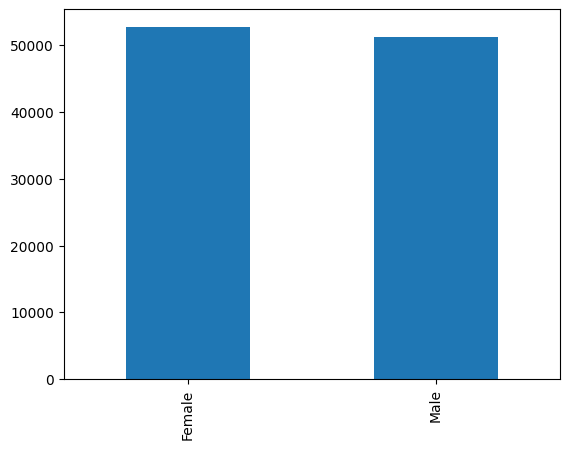

In [6]:
df['Gender'].value_counts().plot(kind='bar')
plt.show()

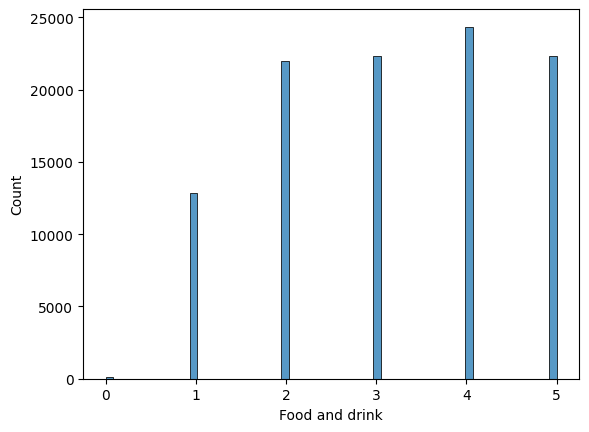

-0.1512794969916901

In [7]:
sns.histplot(df, x='Food and drink')
plt.show()

df['Food and drink'].skew()

In [8]:
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_9940\426365568.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



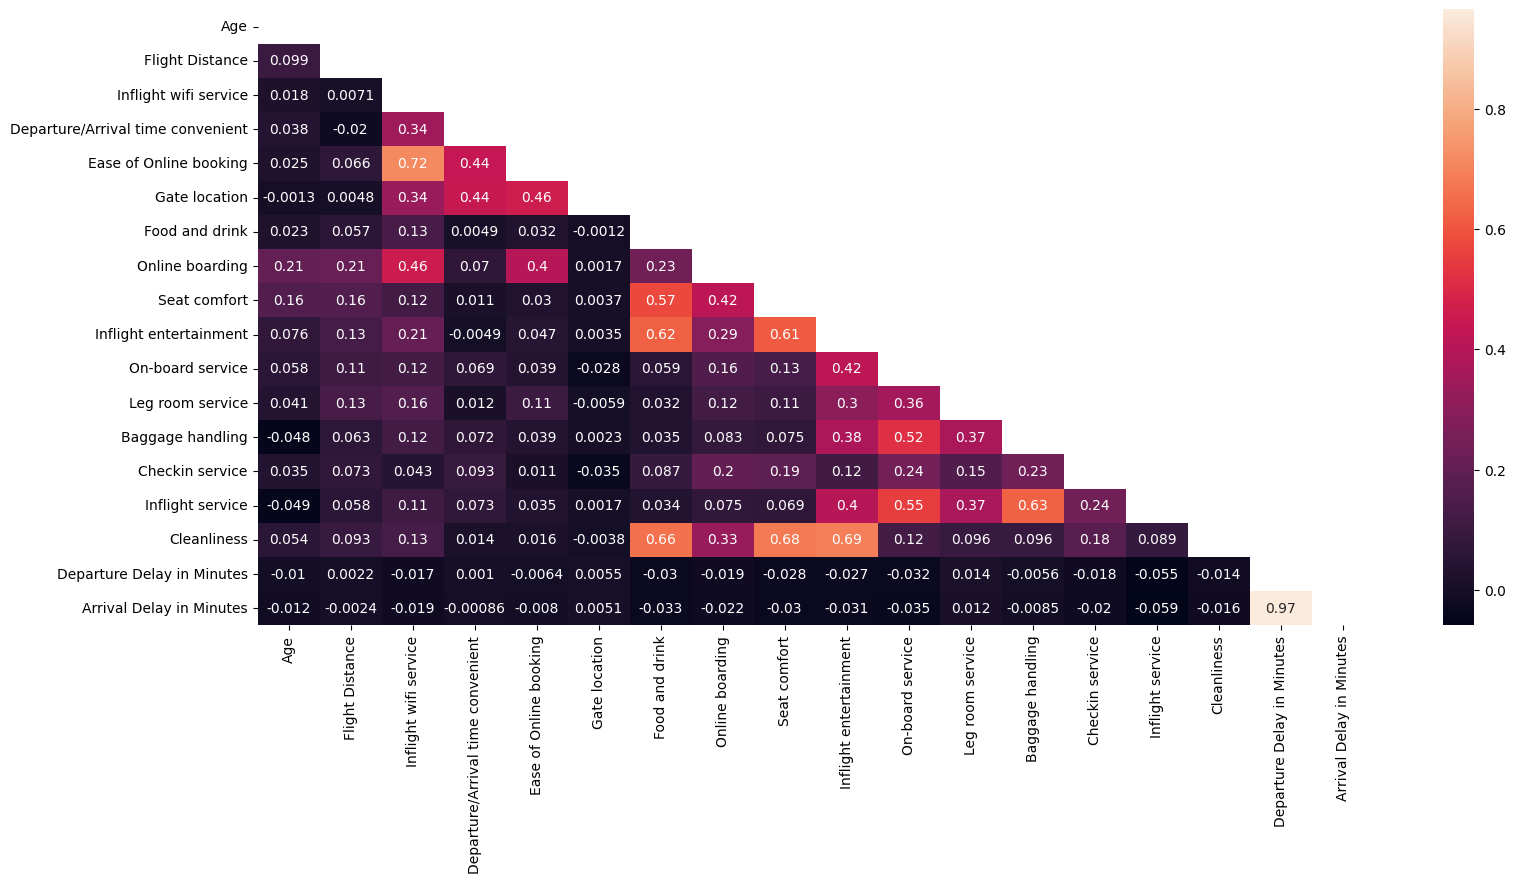

In [9]:
cor = df.corr(method='pearson')
mask = np.zeros_like(cor, dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(18,8))
sns.heatmap(cor, mask=mask, annot=True)
plt.show()

Test de normalidad en la distribución: test de Kolmogorov-Smirnov o el test de Shapiro-Wilk

In [10]:
x = df['Food and drink']

In [11]:
from scipy import stats
if stats.kstest(x, stats.norm.cdf)[0] < 0.05: print('Reject H0: No Normal Distribution')
else: print('No rejection of H0: Distribution is Normal')

No rejection of H0: Distribution is Normal


In [12]:
from scipy import stats
if stats.shapiro(x)[0] < 0.05: print('Reject H0: No Normal Distribution')
else: print('No rejection of H0: Distribution is Normal')

No rejection of H0: Distribution is Normal


c:\Users\Ricardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning:

p-value may not be accurate for N > 5000.



In [13]:
df.satisfaction.value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

Comparar variable ordinal vs categorica --> U de Mann-Whitney. Comprobar homocedasticidad --> test de Levene y test de Fligner-Killeen

Un ejemplo del uso de la prueba U de Mann-Whitney puede encontrarse en un estudio para entender si las actitudes hacia la discriminación salarial, donde las actitudes se miden en una escala ordinal, difieren en función del género.

En este ejemplo, la variable dependiente sería “actitudes hacia la discriminación salarial” y su variable independiente sería “género”, la cual tiene dos grupos: “hombre” y “mujer”.

La variable dependiente debe medirse a nivel ordinal o continuo

La variable independiente debe consistir en dos grupos categóricos e independientes. Algunos ejemplos de variables independientes que cumplen este criterio son el género (2 grupos: hombre o mujer), el estado de empleo (2 grupos: empleado o desempleado), fumador (2 grupos: sí o no), etc.

Segun Palote NOrio, se puede usar Chi2 en este caso. Tabla de contingencia: Filas (Y), Columnas (X)

No se puede usar t de student, no hay variación fija entre los valores ordenados (?)

### U de Mann-Whitney

In [14]:
pvalue = stats.mannwhitneyu(df[df.satisfaction == 'neutral or dissatisfied']['Food and drink'], df[df.satisfaction == 'satisfied']['Food and drink'])[1]
if pvalue < 0.05:print('Reject H0 (Diferencia de medianas no significativa) --> Hay diferencia significativa entre las medianas')
else: print('No Reject H0 (Diferencia de medianas no significativa) --> No hay diferencia significativa entre las medianas')

Reject H0 (Diferencia de medianas no significativa) --> Hay diferencia significativa entre las medianas


In [15]:
pvalue = stats.mannwhitneyu(df[df.Gender == 'Male']['Food and drink'], df[df.Gender == 'Female']['Food and drink'])[1]
if pvalue < 0.05: print('Reject H0 (Diferencia de medianas no significativa) --> Hay diferencia significativa entre las medianas')
else: print('No Reject H0 (Diferencia de medianas no significativa) --> No hay diferencia significativa entre las medianas')

No Reject H0 (Diferencia de medianas no significativa) --> No hay diferencia significativa entre las medianas


### T student

In [25]:
pvalue = stats.ttest_ind(df[df.satisfaction == 'neutral or dissatisfied']
                         ['Flight Distance'], df[df.satisfaction == 'satisfied']['Flight Distance'])[1]
if pvalue < 0.05: print('Reject H0 (No hay relación entre medias) --> Hay diferencia entre las medias')
else: print('No Reject H0 (No hay relación entre medias) --> No hay diferencia entre las medias')

Reject H0 (No hay relación entre medias) --> Hay diferencia entre las medias


In [24]:
pvalue = stats.f_oneway(df[df.satisfaction == 'neutral or dissatisfied']['Flight Distance'], df[df.satisfaction == 'satisfied']['Flight Distance'])[1]
if pvalue < 0.05:
    print('Reject H0 (No hay relación entre medias) --> Hay diferencia entre las medias')
else:
    print('No Reject H0 (No hay relación entre medias) --> No hay diferencia entre las medias')

Reject H0 (No hay relación entre medias) --> Hay diferencia entre las medias


### Chi2

In [18]:
ct = pd.crosstab(df.satisfaction, df['Food and drink'])
pvalue= stats.chi2_contingency(ct)[1]
if pvalue < 0.05: print('Reject H0 (No hay relación entre medias) --> Hay diferencia entre las medias')
else: print('No Reject H0 (No hay relación entre medias) --> No hay diferencia entre las medias')

Reject H0 (No hay relación entre medias) --> Hay diferencia entre las medias


### V de cramer - Medir magnitud de la asociación entre las variables

In [19]:
#Forma 1
from scipy.stats.contingency import association
print(association(ct, method='cramer'))

0.22377966594833737


In [20]:
#Forma 2
X2 = pvalue = stats.chi2_contingency(ct)[0]
N = np.sum(ct.to_numpy())
dimension = min(ct.shape)-1
V = np.sqrt((X2/N)/dimension)
V

0.22377966594833737